<a href="https://colab.research.google.com/github/cyber-prags/ML-and-BioOptimization/blob/main/N_arm_bandit4_modif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-arm bandit problem

-- _Pragyan Jyoti Dutta(201771610) , Patalo Selobakin, Victor Gonzalez Alvarez, Daniela Dzah_

Current epsilon: 0
Average rewards: [0.012540924111649766, 0.27061053770657567, 0.43300872616695724, 0.5698362179449598, 0.6658860943481582, 0.7345175958323703, 0.7540474950189191, 0.7981504112680033, 0.8385901528504166, 0.8601670229660653, 0.8269099203764221, 0.8531726422318687, 0.8984640647336596, 0.921304485101118, 0.9184287811230833, 0.96864086654369, 0.9355345135455966, 0.9418106790894506, 0.9839779770099574, 0.9561573941573724, 0.975851575782206, 0.9900765836652665, 0.9869814980227012, 1.013734491271006, 0.9832855224827638, 0.9468864252569744, 1.0222522887713057, 1.0039366129018745, 0.983958754752153, 0.9835507378752065, 1.0201690856568701, 1.0187554047675487, 0.9807731751669471, 1.0127847261787957, 1.0298410957542692, 1.002204559554366, 1.0090358527158139, 1.0417230028510298, 1.0329944526058776, 0.9719959924893222, 1.0172613760603035, 1.0233721907574627, 0.9696442227566529, 1.0284432977332074, 0.9567128753096902, 1.0136401496984062, 1.0533816980230712, 1.0421764669185694, 0.9883

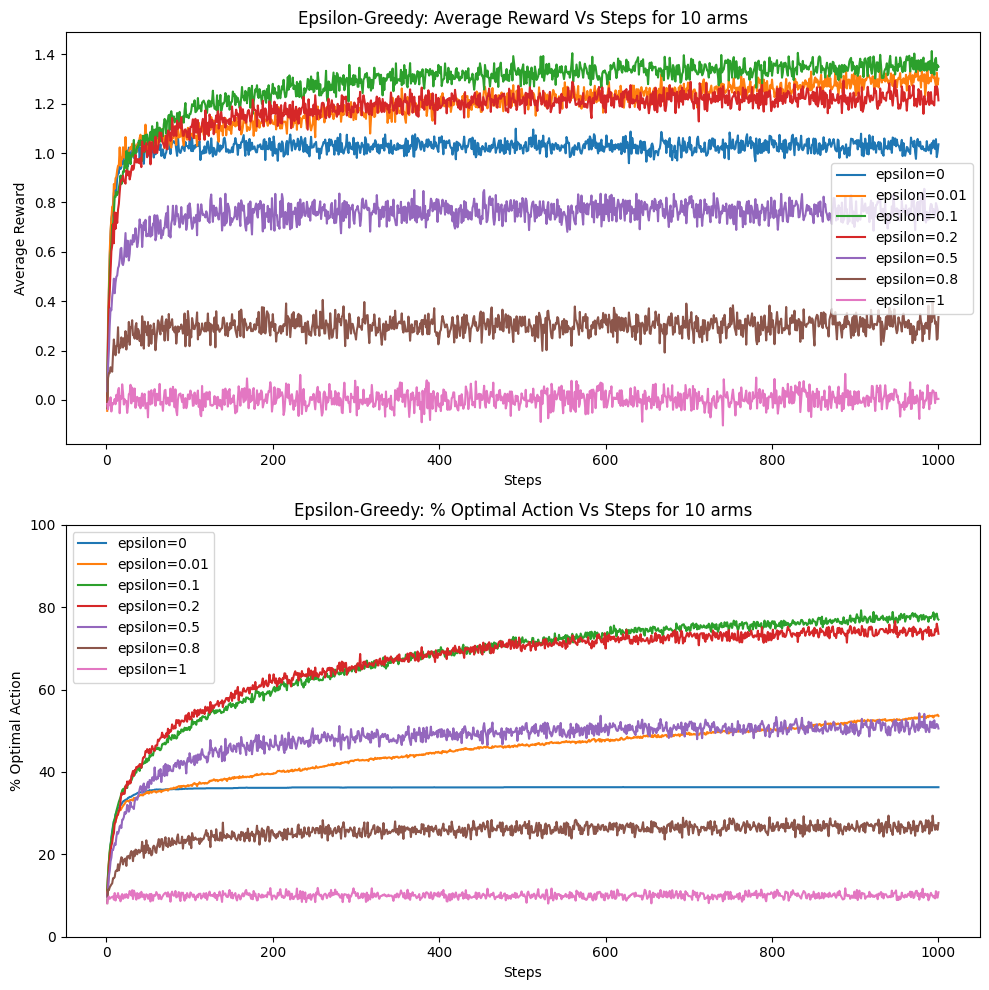

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(0)

# Parameters
n_bandit = 2000  # number of bandit problems
k = 10  # number of arms in each bandit problem
epsilon_options = [0, 0.01, 0.1, 0.2, 0.5,0.8,  1]  # epsilon values to test
max_steps = 1000  # maximum number of steps for each epsilon value

# Function to run the epsilon-greedy bandit algorithm until convergence
def run_epsilon_greedy_bandit(n_bandit, k, epsilon):
    q_true = np.random.normal(0, 1, (n_bandit, k))  # true means q*(a) for each arm for all bandits
    true_opt_arms = np.argmax(q_true, axis=1)  # true optimal arms in each bandit

    # Initialize variables
    Q = np.zeros((n_bandit, k))  # reward estimated
    N = np.ones((n_bandit, k))  # number of times each arm was pulled
    rewards = []
    optimal_action_count = []

    # Run the bandit algorithm until maximum steps reached
    for steps in range(1, max_steps + 1):
        R_pull = []  # all rewards in this pull/time-step
        opt_arm_pull = 0  # number of pulls of best arm in this time step
        for i in range(n_bandit):
            if np.random.random() < epsilon:
                j = np.random.randint(k)
            else:
                j = np.argmax(Q[i])

            if j == true_opt_arms[i]:  # To calculate % optimal action
                opt_arm_pull += 1

            reward_pulled = np.random.normal(q_true[i][j], 1)
            R_pull.append(reward_pulled)
            N[i][j] += 1
            Q[i][j] += (reward_pulled - Q[i][j]) / N[i][j]

        avg_R_pull = np.mean(R_pull)
        rewards.append(avg_R_pull)
        optimal_action_count.append(float(opt_arm_pull) * 100 / n_bandit)

    return rewards, optimal_action_count

# Initialize plots for average reward and % optimal action
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Loop over different epsilon values
for epsilon in epsilon_options:
    print('Current epsilon:', epsilon)

    # Run the bandit algorithm
    avg_rewards, opt_action_percentages = run_epsilon_greedy_bandit(n_bandit, k, epsilon)
    print('Average rewards:', avg_rewards)

    # Plotting
    axes[0].plot(range(1, len(avg_rewards) + 1), avg_rewards, label=f'epsilon={epsilon}')
    axes[1].plot(range(1, len(opt_action_percentages) + 1), opt_action_percentages, label=f'epsilon={epsilon}')

# Set labels and titles
axes[0].set_title('Epsilon-Greedy: Average Reward Vs Steps for 10 arms')
axes[0].set_ylabel('Average Reward')
axes[0].set_xlabel('Steps')
axes[0].legend()

axes[1].set_title('Epsilon-Greedy: % Optimal Action Vs Steps for 10 arms')
axes[1].set_ylabel('% Optimal Action')
axes[1].set_xlabel('Steps')
axes[1].set_ylim(0, 100)
axes[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Little modification

## Importing the necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Setting the initial parameters

In [11]:
# Set the seed for reproducibility
np.random.seed(0)

# Parameters
n_bandit = 2000  # number of bandit problems
k_values = [5, 10, 20]  # different numbers of arms in each bandit problem
epsilon_options = [0, 0.01, 0.1, 0.5, 1]  # epsilon values to test
max_steps = 1000  # maximum number of steps for each epsilon value



In the above **epsilon_values** sets the epsilon values; each determining the probability of choosing exploration over exploitation. Values close to _1_ being more inclined towards more exploration while values close to _0_ being close to preferring more exploitation over exploration.

## Greedy Epsilon Function

In [18]:
# Function to run the epsilon-greedy bandit algorithm until convergence
def run_epsilon_greedy_bandit(n_bandit, k, epsilon):
    q_true = np.random.normal(0, 1, (n_bandit, k))  # true means q*(a) for each arm for all bandits
    true_opt_arms = np.argmax(q_true, axis=1)  # true optimal arms in each bandit

    # Initialize variables
    Q = np.zeros((n_bandit, k))  # reward estimated
    N = np.ones((n_bandit, k))  # number of times each arm was pulled
    rewards = []
    optimal_action_count = []

    # Run the bandit algorithm until maximum steps reached
    for steps in range(1, max_steps + 1):
        R_pull = []  # all rewards in this pull/time-step
        opt_arm_pull = 0  # number of pulls of best arm in this time step
        for i in range(n_bandit):
            if np.random.random() < epsilon:
                j = np.random.randint(k)
            else:
                j = np.argmax(Q[i])

            if j == true_opt_arms[i]:  # To calculate % optimal action
                opt_arm_pull += 1

            reward_pulled = np.random.normal(q_true[i][j], 1)
            R_pull.append(reward_pulled)
            N[i][j] += 1
            Q[i][j] += (reward_pulled - Q[i][j]) / N[i][j]

        avg_R_pull = np.mean(R_pull)
        rewards.append(avg_R_pull)
        optimal_action_count.append(float(opt_arm_pull) * 100 / n_bandit)

    return rewards, optimal_action_count,Q


### Plotting our graphs

In [ ]:
# Loop over different k values
for k in k_values:
    print(f'Running simulations for k = {k}')
    fig, axes = plt.subplots(2,1 , figsize=(14, 8), dpi=80)

    # Loop over different epsilon values
    for epsilon in epsilon_options:
        print('Current epsilon:', epsilon)

        # Run the bandit algorithm
        avg_rewards, opt_action_percentages, Q = run_epsilon_greedy_bandit(n_bandit, k, epsilon)
        # Print the Q-values
        print('Q-values for the arms:')
        for arm_index in range(k):
            print(f'Arm {arm_index + 1}:', Q[:, arm_index].mean())  # Print the average Q-value for each arm across all bandits
        print(' ')
        print('Average rewards:', avg_rewards)
        print(' ')
        print('Percentage of optimal action:',opt_action_percentages)
        print(' ')
        print("Maximum average reward for a single step:", max(avg_rewards))
        print(' ')
        print(f'Optimal percentage of optimal action for epsilon= {epsilon} and arm= {k}:', max(opt_action_percentages))
        print('----------------------------------------------------------------------------------')
        print(' ')
        print(' ')

        # Plotting
        axes[0].plot(range(1, len(avg_rewards) + 1), avg_rewards, label=f'epsilon={epsilon}')
        axes[1].plot(range(1, len(opt_action_percentages) + 1), opt_action_percentages, label=f'epsilon={epsilon}')

    # Set labels and titles
    axes[0].set_title(f'Epsilon-Greedy: Average Reward Vs Steps for {k} arms')
    axes[0].set_ylabel('Average Reward')
    axes[0].set_xlabel('Steps')
    axes[0].legend()

    axes[1].set_title(f'Epsilon-Greedy: % Optimal Action Vs Steps for {k} arms')
    axes[1].set_ylabel('% Optimal Action')
    axes[1].set_xlabel('Steps')
    axes[1].set_ylim(0, 100)
    axes[1].legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


Running simulations for k = 5
Current epsilon: 0
Q-values for the arms:
Arm 1: -0.00738595582879824
Arm 2: 0.012815611767778368
Arm 3: -0.0023768197105372172
Arm 4: 0.003954140175122706
Arm 5: 0.007077864624163986
 
Average rewards: [-0.004479676007441338, 0.2993565532142749, 0.43284963576407165, 0.5590143165008287, 0.638524494301015, 0.6882998985212883, 0.7297712954741744, 0.7399861755530958, 0.7989888561942978, 0.7966231495665085, 0.8381211365046248, 0.8118181475811808, 0.8087157719603021, 0.8580551363984871, 0.8307600433265545, 0.8701008906707952, 0.8622257376359811, 0.8857860648275778, 0.832923198160253, 0.861846619534462, 0.8925501263794879, 0.8765736042564148, 0.8524991989833562, 0.8844444606762132, 0.8453474888120598, 0.9194764790024034, 0.860001625933169, 0.887297864335685, 0.8837132003225856, 0.9147487711878561, 0.8969271891201022, 0.9034740477256475, 0.917537248349835, 0.8502922806519911, 0.9006440266550025, 0.9080150594199088, 0.8947163591358075, 0.8857120189124212, 0.904007